# Introduction to Time Series
NWP models generate a large amount of data, which can be overwhelming. However, extracting specific information and visualizing it can provide valuable insights. One of the most common ways to visualize NWP data is through time series plots, which display how a particular variable changes over time.<br>
In this notebook we will try to understand the basics of time series data, how to generate the data, performing analysis or data manipulation, and visualizing it.<br>
We will use an example data set coming from ERA5 Reanalysis.
You can download it here :<br>
https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=form
<br>
You can choose the variable, period, and data format (grib or netcdf), in this case we will use netcdf format.<br>

# Part 1: Load and read the data

In [1]:
# Import libraries
import xarray as xr
import pandas as pd

In [18]:
# Load the data
file_path = 'D:/Projects/fiji-training-2024/data/sample_t2m.nc'
ds = xr.open_dataset(file_path, engine='netcdf4')
ds

<xarray.Dataset>
Dimensions:    (longitude: 61, latitude: 121, time: 720)
Coordinates:
  * longitude  (longitude) float32 165.0 165.2 165.5 165.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 -5.0 -5.25 -5.5 -5.75 ... -34.5 -34.75 -35.0
  * time       (time) datetime64[ns] 2023-06-01 ... 2023-06-30T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-21 05:35:48 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

This data contain temperature at 2m above the ground level, other coordinates available are latitude, longitude, and time.<br>
Let's check the value for each coordinates

In [19]:
ds['longitude']

<xarray.DataArray 'longitude' (longitude: 61)>
array([165.  , 165.25, 165.5 , 165.75, 166.  , 166.25, 166.5 , 166.75, 167.  ,
       167.25, 167.5 , 167.75, 168.  , 168.25, 168.5 , 168.75, 169.  , 169.25,
       169.5 , 169.75, 170.  , 170.25, 170.5 , 170.75, 171.  , 171.25, 171.5 ,
       171.75, 172.  , 172.25, 172.5 , 172.75, 173.  , 173.25, 173.5 , 173.75,
       174.  , 174.25, 174.5 , 174.75, 175.  , 175.25, 175.5 , 175.75, 176.  ,
       176.25, 176.5 , 176.75, 177.  , 177.25, 177.5 , 177.75, 178.  , 178.25,
       178.5 , 178.75, 179.  , 179.25, 179.5 , 179.75, 180.  ], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 165.0 165.2 165.5 165.8 ... 179.5 179.8 180.0
Attributes:
    units:      degrees_east
    long_name:  longitude

In [20]:
ds['latitude']

<xarray.DataArray 'latitude' (latitude: 121)>
array([ -5.  ,  -5.25,  -5.5 ,  -5.75,  -6.  ,  -6.25,  -6.5 ,  -6.75,  -7.  ,
        -7.25,  -7.5 ,  -7.75,  -8.  ,  -8.25,  -8.5 ,  -8.75,  -9.  ,  -9.25,
        -9.5 ,  -9.75, -10.  , -10.25, -10.5 , -10.75, -11.  , -11.25, -11.5 ,
       -11.75, -12.  , -12.25, -12.5 , -12.75, -13.  , -13.25, -13.5 , -13.75,
       -14.  , -14.25, -14.5 , -14.75, -15.  , -15.25, -15.5 , -15.75, -16.  ,
       -16.25, -16.5 , -16.75, -17.  , -17.25, -17.5 , -17.75, -18.  , -18.25,
       -18.5 , -18.75, -19.  , -19.25, -19.5 , -19.75, -20.  , -20.25, -20.5 ,
       -20.75, -21.  , -21.25, -21.5 , -21.75, -22.  , -22.25, -22.5 , -22.75,
       -23.  , -23.25, -23.5 , -23.75, -24.  , -24.25, -24.5 , -24.75, -25.  ,
       -25.25, -25.5 , -25.75, -26.  , -26.25, -26.5 , -26.75, -27.  , -27.25,
       -27.5 , -27.75, -28.  , -28.25, -28.5 , -28.75, -29.  , -29.25, -29.5 ,
       -29.75, -30.  , -30.25, -30.5 , -30.75, -31.  , -31.25, -31.5 , -31.75,
       -32.  , -32.25, -32.5 , -32.75, -33.  , -33.25, -33.5 , -33.75, -34.  ,
       -34.25, -34.5 , -34.75, -35.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 -5.0 -5.25 -5.5 -5.75 ... -34.5 -34.75 -35.0
Attributes:
    units:      degrees_north
    long_name:  latitude

In [21]:
ds['time']

<xarray.DataArray 'time' (time: 720)>
array(['2023-06-01T00:00:00.000000000', '2023-06-01T01:00:00.000000000',
       '2023-06-01T02:00:00.000000000', ..., '2023-06-30T21:00:00.000000000',
       '2023-06-30T22:00:00.000000000', '2023-06-30T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2023-06-01 ... 2023-06-30T23:00:00
Attributes:
    long_name:  time

In [22]:
ds['t2m']

<xarray.DataArray 't2m' (time: 720, latitude: 121, longitude: 61)>
[5314320 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 165.0 165.2 165.5 165.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 -5.0 -5.25 -5.5 -5.75 ... -34.5 -34.75 -35.0
  * time       (time) datetime64[ns] 2023-06-01 ... 2023-06-30T23:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

By that way, we are accessing all the values in the data / coordinate. To have one specific value, we can use the .values method or directly accessing the index.<br>

In [23]:
# see first time coordinate
ds['time'][0].values

numpy.datetime64('2023-06-01T00:00:00.000000000')

In [24]:
# see last latitude coordinate
ds['latitude'][-1].values

array(-35., dtype=float32)

In [25]:
# see temperature value at certain position
ds['t2m'][0,0,0].values

array(302.37405, dtype=float32)

# Part 2: Data Extracting
To do analysis and visualization, we need to extract the data.
There are several way to extract the data, we can use the .sel method, .isel method, or .interp method.
.sel method will extract the data based on the coordinate value, if the coordinate is not in the grid coordinate it will select the nearest grid coordinate.<br>
.interp method will interpolate the data based on the coordinate value, it will give the value based on the linear interpolation of the nearest grid coordinate.<br>

In [29]:
# define latitude and longitude
lat = -17.8
lon = 177.4167

In [34]:
# extract data using .sel method
temp_sel = ds['t2m'].sel(latitude=lat, longitude=lon, method='nearest')
temp_sel.values

array([301.93073, 302.05707, 302.10367, 301.85483, 300.9851 , 299.86505,
       299.34814, 299.36163, 298.4765 , 298.20764, 298.14795, 298.00967,
       297.77817, 297.76624, 297.45386, 297.18655, 297.2008 , 296.96353,
       296.84607, 296.8584 , 297.8375 , 299.0577 , 301.02826, 301.74545,
       301.64954, 301.12262, 299.5673 , 298.73572, 298.6194 , 298.37482,
       297.80783, 297.35025, 297.38956, 297.1858 , 297.3834 , 297.33292,
       297.23972, 297.11914, 297.32022, 297.14536, 297.1049 , 296.95544,
       296.692  , 296.75092, 297.019  , 297.19196, 297.2898 , 297.4812 ,
       297.93225, 298.14987, 298.5566 , 298.76074, 298.91675, 298.71146,
       297.83325, 297.7108 , 297.3776 , 297.02054, 296.54526, 296.3288 ,
       295.87582, 295.89856, 295.6474 , 295.40668, 295.44058, 296.0318 ,
       295.9494 , 296.03992, 297.23932, 298.06476, 299.69672, 300.2167 ,
       300.26294, 299.78146, 299.37357, 299.14014, 298.76462, 298.42026,
       297.90723, 297.48236, 296.6269 , 296.20822, 

In [35]:
# extract data using .interp method
temp_interp = ds['t2m'].interp(latitude=lat, longitude=lon, method='linear')
temp_interp.values

array([301.49652884, 301.57017589, 301.61583214, 301.47218009,
       300.75804951, 299.97669449, 299.56153851, 299.50579996,
       298.76340984, 298.52984623, 298.52015046, 298.39538466,
       298.20047318, 298.1767355 , 297.93761896, 297.74043606,
       297.74321541, 297.56269907, 297.44345429, 297.43969125,
       298.16613655, 299.0878926 , 300.62281408, 301.23536102,
       301.19215934, 300.78209255, 299.73245782, 299.09302309,
       298.97140097, 298.77081935, 298.3286802 , 297.91100333,
       297.86281086, 297.6452492 , 297.74762058, 297.71366196,
       297.66054959, 297.575124  , 297.72358694, 297.56116238,
       297.52463943, 297.39779823, 297.18482106, 297.24652067,
       297.40459618, 297.42789998, 297.65506454, 297.82717513,
       298.19311827, 298.38008452, 298.70650681, 298.88287679,
       299.01267588, 298.89270827, 298.31758308, 298.22814362,
       297.94627136, 297.61934391, 297.17101052, 296.95758637,
       296.56501867, 296.53432601, 296.30985168, 296.12

See that the data still in Kelvin, you can convert it either by doing operation directly to the dataset or by transforming it to dataframe and do the operation there.<br>

In [36]:
# convert to celcius
temp_sel_c = temp_sel - 273.15
temp_interp_c = temp_interp - 273.15
temp_sel_c.values

array([28.780731, 28.907074, 28.953674, 28.704834, 27.835114, 26.715057,
       26.19815 , 26.21164 , 25.326508, 25.057648, 24.997955, 24.85968 ,
       24.628174, 24.616241, 24.303864, 24.03656 , 24.050812, 23.813538,
       23.696075, 23.708405, 24.6875  , 25.907715, 27.878265, 28.595459,
       28.499542, 27.972626, 26.417297, 25.585724, 25.46939 , 25.224823,
       24.657837, 24.200256, 24.239563, 24.035797, 24.233398, 24.182922,
       24.089722, 23.969147, 24.170227, 23.995361, 23.954895, 23.80545 ,
       23.541992, 23.600922, 23.869019, 24.041962, 24.139801, 24.331207,
       24.782257, 24.999878, 25.406616, 25.610748, 25.766754, 25.561462,
       24.683258, 24.560791, 24.2276  , 23.870544, 23.395264, 23.178802,
       22.72583 , 22.748566, 22.497406, 22.256683, 22.290588, 22.881805,
       22.799408, 22.889923, 24.089325, 24.914764, 26.546722, 27.066711,
       27.112946, 26.63147 , 26.223572, 25.990143, 25.614624, 25.270264,
       24.757233, 24.332367, 23.476898, 23.058228, 

In [40]:
# transform to dataframe
df = temp_interp.to_dataframe()
df

,latitude,longitude,t2m
time,,,
2023-06-01 00:00:00,-17.8,177.4167,301.496529
2023-06-01 01:00:00,-17.8,177.4167,301.570176
2023-06-01 02:00:00,-17.8,177.4167,301.615832
2023-06-01 03:00:00,-17.8,177.4167,301.472180
2023-06-01 04:00:00,-17.8,177.4167,300.758050
...,...,...,...
2023-06-30 19:00:00,-17.8,177.4167,292.376356
2023-06-30 20:00:00,-17.8,177.4167,293.933152
2023-06-30 21:00:00,-17.8,177.4167,295.545141


In [41]:
# save to csv for later use
df.to_csv('D:/Projects/fiji-training-2024/data/sample_t2m_fiji.csv')

For the quick look, we can simply plot the time series data using the .plot method.<br>

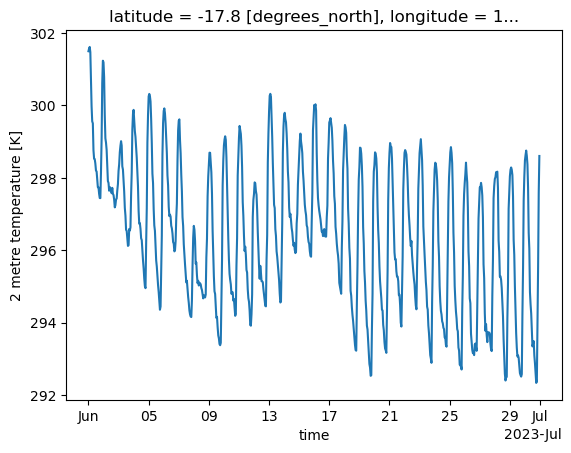

In [43]:
temp_interp.plot()

### Your turn
Extract data from the following coordinates:<br>
<table class="htCore"><colgroup><col style="width: 210px;"><col style="width: 90px;"><col style="width: 90px;"><col style="width: 100px;"><col style="width: 50px;"><col style="width: 150px;"><col style="width: 100px;"><col style="width: 140px;"><col style="width: 160px;"></colgroup><thead><tr><th class="" style="height: 25px;"><div class="relative"><span class="colHeader columnSorting">city</span></div></th><th class=""><div class="relative"><span class="colHeader columnSorting">lat</span></div></th><th class=""><div class="relative"><span class="colHeader columnSorting">lng</span></div></th><th class=""><div class="relative"><span class="colHeader columnSorting">country</span></div></th><th class=""><div class="relative"><span class="colHeader columnSorting">iso2</span></div></th><th class=""><div class="relative"><span class="colHeader columnSorting">admin_name</span></div></th><th class=""><div class="relative"><span class="colHeader columnSorting">capital</span></div></th><th class=""><div class="relative"><span class="colHeader columnSorting">population</span></div></th><th class=""><div class="relative"><span class="colHeader columnSorting">population_proper</span></div></th></tr></thead><tbody><tr><td class="current area">Suva</td><td class="area">-18.1416</td><td class="area">178.4419</td><td class="">Fiji</td><td class="">FJ</td><td class="">Rewa</td><td class="">primary</td><td class="">185913</td><td class="">88271</td></tr><tr><td class="area">Nadi</td><td class="area">-17.8000</td><td class="area">177.4167</td><td class="">Fiji</td><td class="">FJ</td><td class="">Ba</td><td class=""></td><td class="">71048</td><td class="">71048</td></tr><tr><td class="area">Nausori</td><td class="area">-18.0244</td><td class="area">178.5454</td><td class="">Fiji</td><td class="">FJ</td><td class="">Tailevu</td><td class=""></td><td class="">57882</td><td class="">57882</td></tr><tr><td class="area">Lautoka</td><td class="area">-17.6242</td><td class="area">177.4528</td><td class="">Fiji</td><td class="">FJ</td><td class="">Ba</td><td class=""></td><td class="">52220</td><td class="">52220</td></tr><tr><td class="area">Labasa</td><td class="area">-16.4311</td><td class="area">179.3703</td><td class="">Fiji</td><td class="">FJ</td><td class="">Macuata</td><td class=""></td><td class="">27949</td><td class="">27949</td></tr><tr><td class="area">Lami</td><td class="area">-18.1167</td><td class="area">178.4167</td><td class="">Fiji</td><td class="">FJ</td><td class="">Rewa</td><td class=""></td><td class="">20529</td><td class="">20529</td></tr><tr><td class="area">Nakasi</td><td class="area">-18.0667</td><td class="area">178.5167</td><td class="">Fiji</td><td class="">FJ</td><td class="">Naitasiri</td><td class=""></td><td class="">18919</td><td class="">18919</td></tr><tr><td class="area">Ba</td><td class="area">-17.5333</td><td class="area">177.6833</td><td class="">Fiji</td><td class="">FJ</td><td class="">Ba</td><td class=""></td><td class="">18526</td><td class="">18526</td></tr><tr><td class="area">Sigatoka</td><td class="area">-18.1414</td><td class="area">177.5069</td><td class="">Fiji</td><td class="">FJ</td><td class="">Nadroga and Navosa</td><td class=""></td><td class="">9622</td><td class="">9622</td></tr><tr><td class="area">Navua</td><td class="area">-18.2200</td><td class="area">178.1800</td><td class="">Fiji</td><td class="">FJ</td><td class="">Serua</td><td class=""></td><td class="">5812</td><td class="">5812</td></tr><tr><td class="area">Vaileka</td><td class="area">-17.3667</td><td class="area">178.1500</td><td class="">Fiji</td><td class="">FJ</td><td class="">Ra</td><td class=""></td><td class="">5078</td><td class="">5078</td></tr><tr><td class="area">Savusavu</td><td class="area">-16.7808</td><td class="area">179.3331</td><td class="">Fiji</td><td class="">FJ</td><td class="">Cakaudrove</td><td class=""></td><td class="">5000</td><td class="">5000</td></tr><tr><td class="area">Levuka</td><td class="area">-17.6840</td><td class="area">178.8401</td><td class="">Fiji</td><td class="">FJ</td><td class="">Lomaiviti</td><td class=""></td><td class="">4397</td><td class="">1131</td></tr></tbody></table>

<br>
Save the data to csv file.
Hint : Try to use looping.
<br>
Try to plot each extracted data.